In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
data=pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [6]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.25)

In [8]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
from sklearn.naive_bayes import MultinomialNB

In [10]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score


In [12]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [13]:
test = ["Hey, You have won a lottery woth $500 click the link to claim it !! "]

In [14]:
clf.predict(test)

array([1], dtype=int64)

In [15]:
predictions = clf.predict(test)
string_predictions = []

for pred in predictions:
    if pred == 0:
        string_predictions.append("The SMS/E-mail is not a Spam !!")
    elif pred == 1:
        string_predictions.append("The SMS/E-mail is a Spam !!")
        
print(string_predictions)


['The SMS/E-mail is a Spam !!']


In [16]:
clf.score(X_test,y_test)

0.9849246231155779

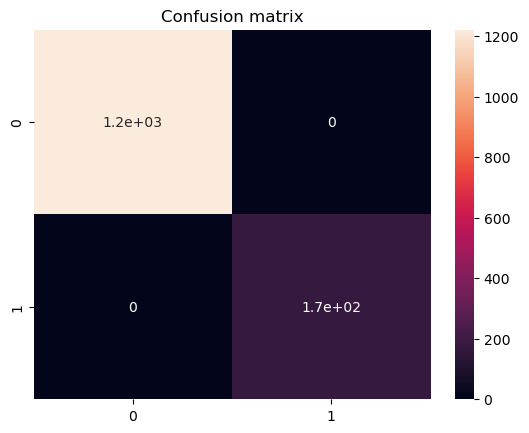

In [17]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_test)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()

In [18]:
# to check whether if a link is a spam or not
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [19]:
# Load the dataset from the CSV file
# Replace 'url_data.csv' with the path to your actual CSV file
df = pd.read_csv('url.csv')
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1
...,...,...
148298,"https://cdn.substack.com/image/fetch/f_auto,q_...",1
148299,https://numlock.substack.com/subscribe,1
148300,https://docs.google.com/forms/d/e/1FAIpQLSfDLO...,1
148301,https://bookclub.substack.com/,1


In [20]:
def extract_features(url):
    features = {}
    # Length of the URL
    features['url_length'] = len(url)
    # Count of `.` in the URL (more subdomains may indicate phishing)
    features['dot_count'] = url.count('.')
    # Whether the URL has HTTPS
    features['https'] = int(url.startswith('https'))
    # Special characters like '@', '?', '%', '=' which are common in phishing URLs
    features['special_char_count'] = len(re.findall(r'[?@%=&]', url))
    # Domain entropy (simple heuristic for randomness)
    domain = re.findall(r'https?://([A-Za-z_0-9.-]+).*', url)
    if domain:
        entropy = -sum([domain[0].count(char) / len(domain[0]) * (len(domain[0]) / domain[0].count(char)) 
                        for char in set(domain[0])])
        features['domain_entropy'] = entropy
    else:
        features['domain_entropy'] = 0
    
    return features

In [21]:
# Extract features for all URLs in the CSV file
features = pd.DataFrame([extract_features(url) for url in df['url']])
labels = df['is_spam']

In [22]:
# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [27]:
# Train a Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X1_train, y1_train)

RandomForestClassifier()

In [28]:
# Save the model to disk for future use
joblib.dump(clf, 'url_spam_classifier.pkl')

['url_spam_classifier.pkl']

In [29]:
# Predict on the test data
y_pred = clf.predict(X1_test)

In [30]:
print("Accuracy:", accuracy_score(y1_test, y_pred))
print("Classification Report:\n", classification_report(y1_test, y_pred))

Accuracy: 0.8875627928930245
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     20263
           1       0.83      0.81      0.82      9398

    accuracy                           0.89     29661
   macro avg       0.87      0.87      0.87     29661
weighted avg       0.89      0.89      0.89     29661



### To enter a seperate link 

In [36]:
import joblib

# Load the trained model
clf = joblib.load('url_spam_classifier.pkl')

# Function to classify a new URL
def classify_url(url):
    # Extract features from the new URL
    url_features = extract_features(url)
    
    # Convert the features into a DataFrame (to match the model's input format)
    url_features_df = pd.DataFrame([url_features])
    
    # Make prediction (0: Legitimate, 1: Spam)
    prediction = clf.predict(url_features_df)
    
    # Return result
    if prediction == 1:
        return f"The URL '{url}' is classified as SPAM."
    else:
        return f"The URL '{url}' is classified as LEGITIMATE."

# Test with an example URL
new_url = "https://youtube.com/"
result = classify_url(new_url)
print(result)


The URL 'https://youtube.com/' is classified as LEGITIMATE.


### To enter a Text and extract the url from it

In [ ]:
def extract_first_url(text):
    # Regular expression pattern for extracting URLs
    url_pattern = r'(https?://[^\s]+)'
    
    # Extract all URLs from the text
    urls = re.findall(url_pattern, text)
    
    # Return the first URL if any are found, otherwise return None
    return urls[0] if urls else None

# Enter the SMS/E-Mail to be checked
text = """Here are some links: https://www.youtube.com """

# Extract and return the first URL
first_url = extract_first_url(text)


#Input it to the Model

import joblib

# Load the trained model
clf = joblib.load('url_spam_classifier.pkl')

# Function to classify a new URL
def classify_url(url):
    # Extract features from the new URL
    url_features = extract_features(url)
    
    # Convert the features into a DataFrame (to match the model's input format)
    url_features_df = pd.DataFrame([url_features])
    
    # Make prediction (0: Legitimate, 1: Spam)
    prediction = clf.predict(url_features_df)
    
    # Return result
    if prediction == 1:
        return f"The URL '{url}' is classified as SPAM."
    else:
        return f"The URL '{url}' is classified as LEGITIMATE."

# Test with an example URL
new_url = first_url
result = classify_url(new_url)
print(result)